In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils
from PIL import Image

In [2]:
n = 800
p = 500
profile = 'polynomial'
profile_test = 'polynomial'
tau = 0.05
alpha = 1
sig = 1

Lambda_min = 0.1
Lambda_max = 6
Lambda_nb_points = 20
Lambdas = np.linspace(Lambda_min, Lambda_max, Lambda_nb_points)


Gamma = utils.variance_profile(profile, n, p, tau = tau)
Gamma_test = utils.variance_profile(profile_test, 1, p, tau = tau)
rts = [utils.R_ts(l, Gamma, Gamma_test, n, p, alpha = alpha, sig = sig, mse = True, profile_test = profile_test, eps = 0) for l in Lambdas]
Risk = [x[0] for x in rts]
Equivalent_Risk = [x[1] for x in rts]
Risk_realisation = [x[2] for x in rts]

Text(0.5, 0, 'lambda')

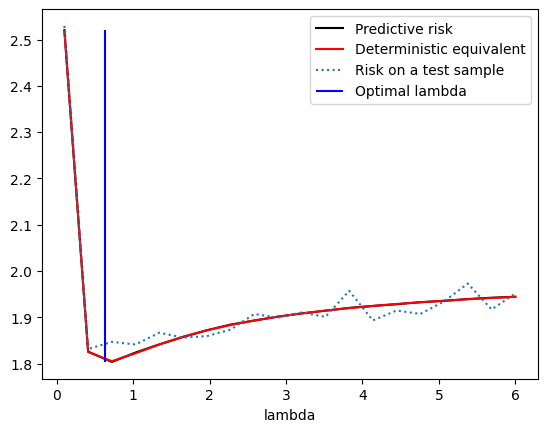

In [3]:
plt.plot(Lambdas, Risk, color = 'black')
plt.plot(Lambdas, Equivalent_Risk, color = 'red')
plt.plot(Lambdas, Risk_realisation,':')

plt.vlines(sig*sig*p/(alpha*alpha*n), np.min(Risk), np.max(Risk), color='blue')
plt.legend(["Predictive risk","Deterministic equivalent", "Risk on a test sample", "Optimal lambda"], loc = 'upper right')
plt.xlabel('lambda')

In [7]:
n = 800
p = 400


tau = 0.005
#tau = 10


alpha = 1
sig = 1

lam_min = 0.03
lam_max = 10
lam_nb_points = 80
lams = np.linspace(lam_min, lam_max, lam_nb_points)


Gamma_const = utils.variance_profile('constant', n, p, tau = tau)
Gamma_const_test = utils.variance_profile('constant', 1, p, tau = tau)
rts_const = [utils.R_ts(l, Gamma_const, Gamma_const_test, n, p, alpha = alpha, sig = sig) for l in lams]
rs0_const = [x[0] for x in rts_const]
rs1_const = [x[1] for x in rts_const]


Gamma_const_pw = utils.variance_profile('const_piecewise', n, p, tau = tau)
Gamma_const_pw_test = utils.variance_profile('const_piecewise', 1, p, tau = tau)
rts_const_pw  = [utils.R_ts(l, Gamma_const_pw, Gamma_const_pw_test, n, p, alpha = alpha, sig = sig) for l in lams]
rs0_const_pw  = [x[0] for x in rts_const_pw ]
rs1_const_pw  = [x[1] for x in rts_const_pw ]


Gamma_db_sto = utils.variance_profile('doubly_stochastic', n, p, tau = tau, K = 1000)
Gamma_db_sto_test = utils.variance_profile('doubly_stochastic', 1, p, tau = tau, K = 1000)
rts_db_sto = [utils.R_ts(l, Gamma_db_sto, Gamma_db_sto_test, n, p, alpha = alpha, sig = sig) for l in lams]
rs0_db_sto = [x[0] for x in rts_db_sto]
rs1_db_sto = [x[1] for x in rts_db_sto]


Gamma_poly = utils.variance_profile('polynomial', n, p, param_exp = 10)
Gamma_poly_test = utils.variance_profile('polynomial', 1, p, param_exp = 10)
rts_poly = [utils.R_ts(l, Gamma_poly, Gamma_poly_test, n, p, alpha = alpha, sig = sig) for l in lams]
rs0_poly = [x[0] for x in rts_poly]
rs1_poly = [x[1] for x in rts_poly]

Gamma_pw3 = utils.variance_profile('block', n, p, param_exp = 10)
Gamma_pw3_test = utils.variance_profile('block', 1, p, param_exp = 10)
rts_pw3 = [utils.R_ts(l, Gamma_pw3, Gamma_pw3_test, n, p, alpha = alpha, sig = sig) for l in lams]
rs0_pw3 = [x[0] for x in rts_pw3]
rs1_pw3 = [x[1] for x in rts_pw3]

Gamma_col = utils.variance_profile('alternate_column', n, p, param_exp = 10)
Gamma_col_test = utils.variance_profile('alternate_column', 1, p, param_exp = 10)
rts_col = [utils.R_ts(l, Gamma_col, Gamma_col_test, n, p, alpha = alpha, sig = sig) for l in lams]
rs0_col = [x[0] for x in rts_col]
rs1_col = [x[1] for x in rts_col]

Text(0.5, 0, 'lambda')

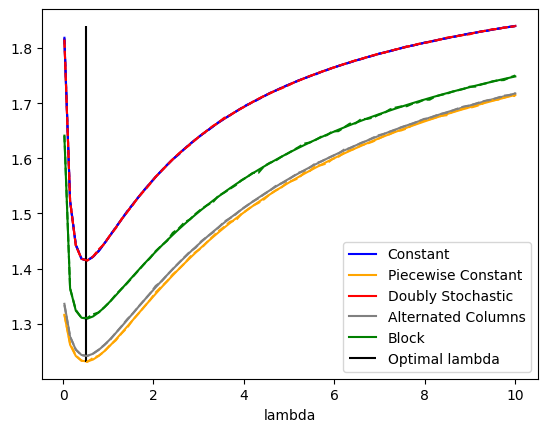

In [10]:
plt.plot(lams, rs1_const, color = 'blue')
plt.plot(lams, rs1_const_pw, color = 'orange')
plt.plot(lams, rs1_db_sto, color = 'red')
plt.plot(lams, rs1_col, color = 'grey')
plt.plot(lams, rs1_pw3, color = 'green')
plt.vlines(sig*sig*p/(alpha*alpha*n), np.min(rs0_const_pw), np.max(rs0_const), color = 'black')

plt.plot(lams, rs0_const, '--', color = 'blue')
plt.plot(lams, rs0_const_pw, '--', color = 'orange')
plt.plot(lams, rs0_db_sto, '--', color = 'red')
plt.plot(lams, rs0_col,'--', color = 'grey')
plt.plot(lams, rs0_pw3,'--', color = 'green')

plt.legend(["Constant","Piecewise Constant", "Doubly Stochastic","Alternated Columns", "Block", "Optimal lambda"])
plt.xlabel('lambda')